# Week 6 - Class and Built-In Functions

**Goal 1** : 여러 개의 function이 합쳐져서 이루는 class에 대해서 알아보자.

**Goal 2** : Python에서 정말 자주 쓰이는 built-in functions에 대해서 알아보자.

### Note

Week 6부터 final exam까지는, 이전 Week 5까지에 비해 각 template 내에서 학습하는 **양**이 현저히 적어질 것이다.

하지만, 그만큼 **질**적으로 깊고 어려워지므로, 더욱더 '직접 해보는' 습관을 길러야 한다.

<br><br>
이제, 모든 학습 내용마다 있었던, guideline이 달린 예제 코드를 수동적으로 실행해보는 것은 의미가 없다. 처음부터 끝까지, 본인이 직접 쳐보고, 실패하고, 재도전하고, 실패하고, 또 실패하고 결국 성공해내는 연습을 해야한다.<br><br>

참고로, 선생님 또한 프로그래밍 공부 당시 셀 실행을 하루 평균 약 300 ~ 400번 정도 하였다. (Week 1 ~ Week 5 templates의 평균 셀 개수 : 150개)

## 1.Class

계산기를 사용해 보았을 것이다. 계산기에 숫자 3을 입력하고 + 기호를 입력한 후 4를 입력하면 결괏값으로 7을 보여 준다. 다시 한 번 + 기호를 입력한 후 3을 입력하면 기존 결괏값 7에 3을 더해 10을 보여 준다.

<br><br>즉 계산기는 이전에 계산한 결괏값을 항상 메모리 어딘가에 저장하고 있어야 한다.

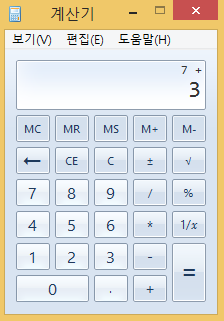

이런 내용을 우리가 앞에서 익힌 함수를 이용해 구현해 보자. 계산기의 "더하기" 기능을 구현한 파이썬 코드는 다음과 같다.

In [ ]:
result = 0

def add(num):
    global result
    result += num
    return result

print(add(3))
print(add(4))

add 함수는 입력 값을 이전에 계산한 결괏값에 더한 후 돌려주는 함수이다.

이전에 계산한 결괏값을 유지하기 위해서 result 전역 변수(global)를 사용했다. 

<br>그런데 만일 한 프로그램에서 2대의 계산기가 필요한 상황이 발생하면 어떻게 해야 할까? 각 계산기는 각각의 결괏값을 유지해야 하기 때문에 위와 같이 add 함수 하나만으로는 결괏값을 따로 유지할 수 없다.
<br><br>
이런 상황을 해결하려면 다음과 같이 함수를 각각 따로 만들어야 한다.

In [ ]:
result1 = 0
result2 = 0

def add1(num):
    global result1
    result1 += num
    return result1

def add2(num):
    global result2
    result2 += num
    return result2

print(add1(3))
print(add1(4))
print(add2(3))
print(add2(7))

똑같은 일을 하는 add1과 add2 함수를 만들었고 각 함수에서 계산한 결괏값을 유지하면서 저장하는 전역 변수 result1, result2가 필요하게 되었다.

결괏값은 다음과 같이 의도한 대로 출력된다.

In [ ]:
3
7
3
10

계산기 1의 결괏값이 계산기 2에 아무 영향을 끼치지 않음을 확인할 수 있다. <br><br>하지만 계산기가 3개, 5개, 10개로 점점 더 많이 필요해진다면 어떻게 해야 할까? 그때마다 전역 변수와 함수를 추가할 것인가? 여기에 계산기마다 빼기나 곱하기와 같은 기능을 추가해야 한다면 상황은 점점 더 어려워질 것이다.
<br><br><br><br>
아직 클래스에 대해 배우지 않았지만, 위와 같은 경우에 **클래스**를 사용하면 다음과 같이 간단하게 해결할 수 있다.

In [ ]:
class Calculator: # You haven't learn this yet tho...
    def __init__(self):
        self.result = 0

    def add(self, num):
        self.result += num
        return self.result

cal1 = Calculator()
cal2 = Calculator()

print(cal1.add(3))
print(cal1.add(4))
print(cal2.add(3))
print(cal2.add(7))

프로그램을 실행하면 함수 2개를 사용했을 때와 동일한 결과가 출력된다.

In [ ]:
3
7
3
10

Calculator **class**로 만든 별개의 계산기 cal1, cal2(Python에서는 이것을 **object**라고 부른다)가 각각의 역할을 수행한다. <br><br>그리고 계산기(cal1, cal2)의 결괏값 역시, 다른 계산기의 결괏값과 상관없이 독립적인 값을 유지한다. <br><br>클래스를 사용하면 계산기 대수가 늘어나더라도 객체를 생성만 하면 되기 때문에, 함수를 사용하는 경우와 달리 매우 간단해진다. <br><br>만약 빼기 기능을 더하려면 Calculator class에 다음과 같은 빼기 기능 함수를 추가해 주면 된다.

In [ ]:
class Calculator:
    def __init__(self):
        self.result = 0

    def add(self, num):
        self.result += num
        return self.result

    def sub(self, num): # Newly added function
        self.result -= num
        return self.result

### Class and Object

클래스를 가장 잘 설명 해 주는 다음의 그림을 보자.

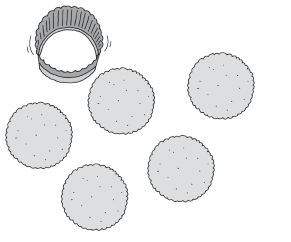

과자를 만드는 과자 틀과 그것을 사용해 만든 과자이다.

- 과자 틀 → 클래스 (class)
- 과자 틀에 의해서 만들어진 과자 → 객체 (object)

여기에서 설명할 클래스는 과자 틀과 비슷하다. 클래스(class)란 똑같은 무엇인가를 계속해서 만들어 낼 수 있는 설계 도면이고(과자 틀), 객체(object)란 클래스로 만든 피조물(과자 틀을 사용해 만든 과자)을 뜻한다.

<br><br>Class로 만든 object에는 중요한 특징이 있다. 바로 **object마다 고유한 성격**을 가진다는 것이다. <br><br>과자 틀로 만든 과자에 구멍을 뚫거나 조금 베어 먹더라도, 다른 과자에는 아무 영향이 없는 것과 마찬가지로 동일한 class로 만든 object들은 서로 전혀 영향을 주지 않는다.

다음은 Python class의 가장 간단한 예이다.

In [ ]:
class Cookie:
   pass

위의 클래스는 아무 기능도 갖고 있지 않은 껍질뿐인 클래스이다. 하지만 이렇게 껍질뿐인 클래스도 객체를 생성하는 기능이 있다. "과자 틀"로 "과자"를 만드는 것처럼 말이다.<br><br>

객체는 클래스로 만들며, 1개의 클래스는 무수히 많은 객체를 만들어 낼 수 있다. 위에서 만든 Cookie 클래스의 객체를 만드는 방법은 다음과 같다.

In [ ]:
a = Cookie()
b = Cookie()

Cookie()의 결괏값을 돌려받은 a와 b가 바로 **object(객체)**이다. 마치 함수를 사용해서 그 결괏값을 돌려받는 모습과 비슷하다.

### Four Arithmetic Operations Class

사칙연산을 가능하게 하는 FourCal 클래스가 다음처럼 동작한다고 가정해 보자. 즉, 아직 실행되지는 않겠지만, 다음과 같이 코드를 썼을 때 원하는 결과가 나오도록 구상해보자.
<br><br>
먼저 a = FourCal()를 입력해서 a라는 객체를 만든다.

In [ ]:
a = FourCal()

그런 다음 a.setdata(4, 2)처럼 입력해서 숫자 4와 2를 a에 지정해 주고

In [ ]:
a.setdata(4, 2)

a.add()를 수행하면 두 수를 합한 결과(4 + 2)를 리턴하고

In [ ]:
print(a.add())

a.mul()을 수행하면 두 수를 곱한 결과(4 * 2)를 리턴하고

In [ ]:
print(a.mul())

a.sub()를 수행하면 두 수를 뺀 결과(4 - 2)를 리턴하고

In [ ]:
print(a.sub())

a.div()를 수행하면 두 수를 나눈 결과(4 / 2)를 리턴한다.

In [ ]:
print(a.div())

이렇게 동작하는 FourCal 클래스를 만드는 것이 바로 우리의 목표이다.

### 객체에 숫자 지정할 수 있게 만들기

이제 더하기, 나누기, 곱하기, 빼기등의 기능을 하는 객체를 만들어야 한다. <br><br>그런데 이러한 기능을 갖춘 객체를 만들려면 우선 a 객체에 사칙연산을 할 때 사용할 2개의 숫자를 먼저 알려주어야 한다. 다음과 같이 연산을 수행할 대상(4, 2)을 객체에 지정할 수 있게 만들어 보자.

In [ ]:
a.setdata(4, 2)

위 문장이 동작하려면 다음과 같이 코드를 수정해야 한다.

In [ ]:
class FourCal:
    def setdata(self, first, second):
        self.first = first
        self.second = second

앞에서 만든 FourCal 클래스에서 pass 문장을 삭제하고 그 대신 setdata 함수를 만들었다. <br><br>Class 안에 구현된 함수는 다른 말로 **메서드**(Method)라고 부른다. 앞으로 클래스 내부의 함수는 항상 **메서드**라고 표현할 테니 메서드라는 용어를 기억해 두자.

일반적인 함수를 만들 때 다음과 같이 작성한다.

In [ ]:
def 함수명(매개변수):
    수행할 문장
    ...

**메서드**도 클래스에 포함되어 있다는 점만 제외하면 일반 함수와 다를 것이 없다.

setdata 메서드를 다시 보면 다음과 같다.

In [ ]:
def setdata(self, first, second):   # 메서드의 매개변수 - self는 무엇일까?
    self.first = first              # 메서드의 수행문 - 여기에도 self가 있네
    self.second = second            # 메서드의 수행문 - 뭐야 여기에도?

setdata 메서드는 **매개변수로 self, first, second 3개의 입력값**을 받는다. <br><br>그런데 일반 함수와는 달리 메서드의 **첫 번째 매개변수 self**는 특별한 의미를 가진다.

다음과 같이 a object를 만들고, a object를 통해 setdata 메서드를 호출해 보자.

In [ ]:
a = FourCal()
a.setdata(4, 2)

Object를 통해 class의 method를 호출하려면 a.setdata(4, 2)와 같이 dot(.) 연산자를 사용해야 한다.
<br><br>
그런데 뭔가 좀 이상하지 않은가? <br><br>setdata 메서드에는 self, first, second **총 3개의 매개변수**가 필요한데, 실제로는 a.setdata(4, 2)처럼 **2개 값만 전달**했다. 왜 그럴까? <br><br>그 이유는 a.setdata(4, 2)처럼 호출하면, setdata 메서드의 첫 번째 매개변수 self에는 setdata메서드를 호출한 객체 a가 자동으로 전달되기 때문이다. <br><br><br><br>다음 그림을 보면 객체를 호출할 때 입력한 값이 메서드에 어떻게 전달되는지 쉽게 이해할 수 있을 것이다.



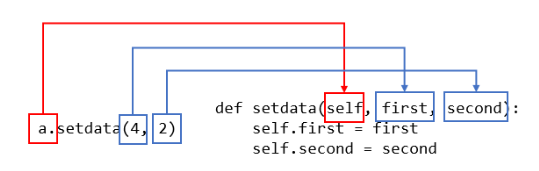

Python method의 첫 번째 parameter 이름은 관례적으로 self를 사용한다. 객체를 호출할 때 호출한 객체 자신이 전달되기 때문에 self라는 이름를 사용한 것이다.

### setdata method의 수행문

이제 setdata 메서드의 수행문에 대해 알아보자.

In [ ]:
def setdata(self, first, second):   # 메서드의 매개변수
    self.first = first              # 메서드의 수행문
    self.second = second            # 메서드의 수행문

a.setdata(4, 2)처럼 호출하면 setdata 메서드의 매개변수 first, second에는 각각 값 4와 2가 전달되어 setdata 메서드의 수행문은 다음과 같이 해석된다.

In [ ]:
self.first = 4
self.second = 2

self는 전달된 객체 a이므로 다시 다음과 같이 해석된다.

In [ ]:
a.first = 4
a.second = 2

a.first = 4 라는 문장이 수행되면, a 객체에 객체변수 first가 생성되고 4라는 값이 저장된다. 마찬가지로 a.second = 2 라는 문장이 수행되면, a 객체에 객체변수 second가 생성되고 2라는 값이 저장된다.
<br><br>
객체에 생성되는 객체만의 변수를 **객체변수**라고 부른다.

다음과 같이 확인해 보자.

In [ ]:
a = FourCal()
a.setdata(4, 2)

print(a.first)
print(a.second)

a 객체에 객체변수 first와 second가 생성되었음을 확인할 수 있다.
<br><br>
이번에는 다음과 같이 a, b 객체를 만들어 보자.

In [ ]:
a = FourCal()
b = FourCal()

그리고 a 객체의 객체변수 first를 다음과 같이 생성한다

In [ ]:
a.setdata(4, 2)
print(a.first)

이번에는 b 객체의 객체변수 first를 다음과 같이 생성한다.

In [ ]:
b.setdata(3, 7)
print(b.first)

Q. 위와 같이 진행하면 b 객체의 객체변수 first에는 값 3이 저장된다는 것을 확인할 수 있었다.<br><br> 그렇다면 a 객체의 first는 3으로 변할까? 아니면 기존 값 4를 유지할까?

다음과 같이 그 결과를 확인해 보자.

In [ ]:
print(a.first)

a 객체의 first 값은 b 객체의 first 값에 영향받지 않고 원래 값을 유지하고 있음을 확인할 수 있다. <br><br>이 예제를 통해 강조하고 싶은 점이 바로 이것이다.<br><br> **Class로 만든 object의 객체변수는, 다른 object의 객체변수에 상관없이 독립적인 값을 유지한다.**<br><br><br><br> 클래스에서는 이 부분을 이해하는 것이 가장 중요하다.

다음은 현재까지 완성된 FourCal 클래스이다.

In [ ]:
class FourCal:
    def setdata(self, first, second):
        self.first = first
        self.second = second

Did you understand well so far?

### Try It! 1

Info class를 만들고, class의 object가 height과 weight를 객체 변수로 담을 수 있도록 만들어보시오.

만들었으면, Justin object에 height는 190, weight는 70을 넣어서 확인해보시오.

In [ ]:
class Info:
    def BodyInfo(self, height, weight):
        self.height = height
        self.weight = weight

Justin = Info()
Justin.BodyInfo(190, 70)

Justin.weight
Justin.height

### Addition function

자! 그럼 2개의 숫자 값을 설정해 주었으니 2개의 숫자를 더하는 기능을 방금 만든 클래스에 추가해 보자. <br><br>우리는 다음과 같이 더하기 기능을 갖춘 클래스를 만들어야 한다.

In [ ]:
a = FourCal()
a.setdata(4, 2)

print(a.add())

이 연산이 가능하도록 다음과 같이 FourCal 클래스를 만들어 보자.

In [ ]:
class FourCal:
    def setdata(self, first, second):
        self.first = first
        self.second = second

    # Newly added lines
    def add(self): # New method
        result = self.first + self.second
        return result

새롭게 추가된 것은 add 메서드이다. 이제 클래스를 사용해 보자.

In [ ]:
a = FourCal()
a.setdata(4, 2)

위와 같이 호출하면 앞에서 살펴보았듯이, a object의 first, second 객체변수에는 각각 값 4와 2가 저장될 것이다.

이제 add 메서드를 호출해 보자.

In [ ]:
print(a.add())

a.add()라고 호출하면 add 메서드가 호출되어 값 6이 출력될 것이다. 어떤 과정을 거쳐 값 6이 출력되는지 add 메서드를 따로 떼어 내서 자세히 살펴보자.

In [ ]:
def add(self):
    result = self.first + self.second
    return result

add 메서드의 매개변수는 self이고 리턴 값은 result이다. 리턴 값인 result를 계산하는 부분은 다음과 같다.

In [ ]:
result = self.first + self.second

a.add()와 같이 a 객체에 의해 add 메서드가 수행되면 add 메서드의 self에는 객체 a가 자동으로 입력되므로 위 내용은 다음과 같이 해석된다.

In [ ]:
result = a.first + a.second

위 내용은 a.add() 메서드 호출 전에 a.setdata(4, 2) 가 먼저 호출되어 a.first = 4, a.second = 2 라고 이미 설정되었기 때문에 다시 다음과 같이 해석된다.

In [ ]:
result = 4 + 2

따라서 다음과 같이 a.add()를 호출하면 6을 리턴한다.

In [ ]:
print(a.add())

여기까지 모두 이해한 학생이라면 클래스에 대해 80% 이상을 안 것이다.


Class in Python is actually not that complicated concept!

### Subtraction, multiplication and division functions

In [ ]:
class FourCal:

    def setdata(self, first, second):
        self.first = first
        self.second = second

    def add(self):
        result = self.first + self.second
        return result

    def mul(self): # Newly added method
        result = self.first * self.second
        return result

    def sub(self): # Newly added method
        result = self.first - self.second
        return result

    def div(self): # Newly added method
        result = self.first / self.second
        return result

mul, sub, div 모두 add 메서드에서 배운 것과 동일한 방법이니 따로 설명하지는 않겠다.

정말로 모든 것이 제대로 동작하는지 확인해 보자.

In [ ]:
a = FourCal()
b = FourCal()
a.setdata(4, 2)
b.setdata(3, 8)

a.add()

#a.mul()

#a.sub()

#a.div()

#b.add()

#b.mul()

#b.sub()

#b.div()


### Constructor (생성자)

이번에는 우리가 만든 FourCal 클래스를 다음과 같이 사용해 보자.

In [ ]:
a = FourCal()
a.add()

Object a에 setdata 메서드를 수행하지 않고 add 메서드를 먼저 수행하면 오류가 발생한다.

왜냐하면 setdata 메서드를 수행해야, 객체 a의 객체변수 first와 second가 생성되기 때문이다.

이렇게 객체에 first, second와 같은 초깃값을 설정해야 할 필요가 있을 때는, setdata와 같은 메서드를 호출하여 초깃값을 설정하기보다는 **생성자**를 구현하는 것이 안전한 방법이다.<br><br>

> 생성자(Constructor)란,  객체가 생성될 때 자동으로 호출되는 메서드를 의미한다.

Python method 이름으로 **__init__**를 사용하면 이 메서드는 **생성자**가 된다. 다음과 같이 FourCal 클래스에 생성자를 추가해 보자.

In [ ]:
class FourCal:

    def __init__(self, first, second): # Newly added initializer
        self.first = first
        self.second = second

    def setdata(self, first, second):
        self.first = first
        self.second = second

    def add(self):
        result = self.first + self.second
        return result

    def mul(self):
        result = self.first * self.second
        return result

    def sub(self):
        result = self.first - self.second
        return result

    def div(self):
        result = self.first / self.second
        return result

새롭게 추가된 생성자 __init__ 메서드만 따로 떼어 내서 살펴보자.

In [ ]:
def __init__(self, first, second):
    self.first = first
    self.second = second

__init__ 메서드는 setdata 메서드와 이름만 다르고 모든 게 동일하다. 

단, 메서드 이름을 __init__으로 했기 때문에 생성자로 인식되어 객체가 생성되는 시점에 **자동으로 호출**되는 차이가 있다.

이제 다음처럼 예제를 수행해 보자.

In [ ]:
a = FourCal()

a = FourCal()을 수행할 때 생성자 __init__이 호출되어 위와 같은 오류가 발생했다.

오류가 발생한 이유는 생성자의 매개변수 first와 second에 해당하는 값이 전달되지 않았기 때문이다.
<br><br>
위 오류를 해결하려면, 다음처럼 first와 second에 해당되는 값을 전달하여 객체를 생성해야 한다.

In [ ]:
a = FourCal(4, 2)

위와 같이 수행하면 __init__ 메서드의 매개변수에는 각각 다음과 같은 값이 전달된다.

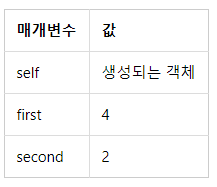

__init__ 메서드도 다른 메서드와 마찬가지로 첫 번째 매개변수 self에 생성되는 객체가 자동으로 전달된다는 점을 기억하자.

따라서 __init__ 메서드가 호출되면 setdata 메서드를 호출했을 때와 마찬가지로 first와 second라는 객체변수가 생성될 것이다.

다음과 같이 객체변수의 값을 확인해 보자.

In [ ]:
a = FourCal(4, 2)
print(a.first)

#print(a.second)


add나 div 등의 메서드도 잘 동작하는지 확인해 보자.

In [ ]:
a = FourCal(4, 2)
a.add()

#a.div()


### (Advanced) Inheritance (상속)

어떤 클래스를 만들 때, 다른 클래스의 기능을 물려받을 수 있게 만드는 것이다. 
<br><br>이번에는 상속 개념을 사용하여 우리가 만든 FourCal 클래스에 ab (a의 b제곱)을 구할 수 있는 기능을 추가해 보자.
<br><br>
앞에서 FourCal 클래스는 이미 만들어 놓았으므로, FourCal 클래스를 상속하는 MoreFourCal 클래스는 다음과 같이 간단하게 만들 수 있다.

In [ ]:
class MoreFourCal(FourCal): # See what is between arrow heads
    pass


클래스를 상속하기 위해서는 다음처럼 클래스 이름 뒤 괄호 안에 **상속할 클래스 이름**을 넣어주면 된다.

> class 클래스 이름(상속할 클래스 이름)

MoreFourCal 클래스는 FourCal 클래스를 상속했으므로 FourCal 클래스의 모든 기능을 사용할 수 있어야 한다.

다음과 같이 확인해 보자.

In [ ]:
a = MoreFourCal(4, 2)
a.add()

#a.mul()

#a.sub()

#a.div()

이제 원래 목적인 a의 b제곱(ab)을 계산하는 MoreFourCal 클래스를 만들어 보자.

In [ ]:
class MoreFourCal(FourCal):

    def pow(self): # Newly added method
        result = self.first ** self.second
        return result

pass 문장은 삭제하고 위와 같이 두 수의 거듭제곱을 구할 수 있는 pow 메서드를 추가했다. 그리고 다음과 같이 pow 메서드를 수행해 보자.

In [ ]:
a = MoreFourCal(4, 2)
a.pow()

#a.add()


MoreFourCal 클래스로 만든 a 객체에 값 4와 2를 설정한 후 pow 메서드를 호출하면 4의 2제곱 (42)인 16을 리턴하는 것을 확인할 수 있다. 상속받은 기능인 add 메서드도 역시 잘 동작한다.
<br><br>
상속은 MoreFourCal 클래스처럼 기존 클래스(FourCal)는 그대로 놔둔 채 클래스의 기능을 확장시킬 때 주로 사용한다.

### Method Overriding

이번에는 FourCal 클래스를 다음과 같이 실행해 보자.

In [ ]:
a = FourCal(4, 0)
a.div()

FourCal 클래스의 객체 a에 4와 0 값을 설정하고 div 메서드를 호출하면 4를 0으로 나누려고 하기 때문에 위와 같은 ZeroDivisionError 오류가 발생한다. <br><br>하지만 0으로 나눌 때 오류가 아닌 0을 리턴하도록 만들고 싶다면 어떻게 해야 할까?

다음과 같이 FourCal 클래스를 상속하는 SafeFourCal 클래스를 만들어 보자.

In [ ]:
class SafeFourCal(FourCal):

    def div(self):
        if self.second == 0:  # 나누는 값이 0인 경우 0을 리턴하도록 수정
            return 0
            
        else:
            return self.first / self.second

SafeFourCal class를 만들면서, 상속받은 FourCal class의 div method를 새롭게 작성했다. 이것이 overriding(덮어쓰기)이다.
<br><br>
SafeFourCal 클래스에 오버라이딩한 div 메서드는 나누는 값이 0인 경우에는 0을 리턴하도록 수정했다. 이제 다시 위에서 수행한 예제를 FourCal 클래스 대신 SafeFourCal 클래스를 사용하여 수행해 보자.

In [ ]:
a = SafeFourCal(4, 0)

a.div()

FourCal 클래스와는 달리 ZeroDivisionError가 발생하지 않고 의도한 대로 0이 리턴되는 것을 확인할 수 있다.

### Try It! 2

Try It! 1에서의 Info class를, __init__ method를 사용하도록 고치자.

In [ ]:
class Info:
    def __init__(self, height, weight):
        self.height = height
        self.weight = weight

이제, 고친 Info class를 상속하는 InfoPrinter class를 만드는 과정에서, height과 weight를 print해주는 **printer** method를 추가하자.

In [ ]:
class InfoPrinter(Info):
  
  def printer(self):
    print(self.height, self.weight)


확인을 위해서, InfoPrinter class에 190과 70을 argument로 넣은 Justin object를 만들고, printer method를 실행해보자.

In [ ]:
Justin = InfoPrinter(190, 70)
Justin.printer()

## 2.Built-In Functions

Python built-in functions 덕분에, 우리는 원하는 기능을 매번 코딩할 필요 없이, 기본적인 함수들을 골라서 사용할 수 있다.

우리는 이미 몇 가지 내장 함수를 배웠다.
print, del, type 등이 바로 그것이다.

<br><br>
Built-in functions 중에서도 정말 중요하고, 자주 사용하는 것들만 가져왔으니 잘 익히길 바란다.

### abs

abs(x)는 어떤 숫자를 입력받았을 때, 그 숫자의 절댓값을 리턴하는 함수이다.

In [ ]:
abs(3)

### all

all(x)는 반복 가능한(iterable) 데이터 x를 입력 값으로 받으며 이 x의 요소가 모두 참이면 True, 거짓이 하나라도 있으면 False를 리턴한다.

반복 가능한 데이터란 for 문에서 사용 가능한 자료형을 의미한다. 리스트, 튜플, 문자열, 딕셔너리, 집합 등이 있다.

다음 예를 보자.

In [ ]:
all([1, 2, 3, 0])

In [ ]:
all((True, False, True, True, True))

False

### any

any(x)는 반복 가능한(iterable) 데이터 x를 입력으로 받아 x의 요소 중 하나라도 참이 있으면 True를 리턴하고, x가 모두 거짓일 때에만 False를 리턴한다. all(x)의 반대이다.

다음 예를 보자.

In [ ]:
any([0, ""])

### chr

chr(i)는 유니코드 숫자값을 입력받아 그 코드에 해당하는 문자를 리턴하는 함수이다.

유니코드는 전 세계의 모든 문자를 컴퓨터에서 일관되게 표현하고 다룰 수 있도록 설계된 산업 표준이다.

In [ ]:
chr(97)

### ord

ord(c)는 문자의 유니코드 숫자 값을 리턴하는 함수이다.

ord 함수는 chr 함수와 반대이다.

In [ ]:
ord('a')

### divmod

divmod(a, b)는 2개의 숫자를 입력으로 받는다. 그리고 a를 b로 나눈 몫과 나머지를 튜플로 리턴하는 함수이다.

In [ ]:
divmod(7, 3)

### (Advanced) enumerate

enumerate는 "열거하다"라는 뜻이다. 이 함수는 순서가 있는 데이터(리스트, 튜플, 문자열)를 입력으로 받아 인덱스 값을 포함하는 enumerate 객체를 리턴한다.

보통 enumerate 함수는 다음 예제처럼 for문과 함께 사용한다.

다음 예를 보자.

In [ ]:
for i, name in enumerate(['body', 'foo', 'bar']):
    print(i, name)

순서 값과 함께 body, foo, bar가 순서대로 출력되었다. 즉 위 예제와 같이 enumerate를 for문과 함께 사용하면 자료형의 현재 순서(index)와 그 값을 쉽게 알 수 있다.

for문처럼 반복되는 구간에서 객체가 현재 어느 위치에 있는지 알려 주는 인덱스 값이 필요할때 enumerate 함수를 사용하면 매우 유용하다.

### Try It! 1

```Li = ['Python', 'Java', 'JavaScript', 'R']```라는 리스트가 있다.

Li 변수와 enumerate를 사용해서, 다음과 같이 출력되도록 만들어보자.

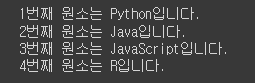

In [ ]:
for i, name in enumerate(['Python', 'Java', 'JavaScript', 'R']):
    print(f"{i + 1}번째 원소는 {name}입니다.")

1번째 원소는 Python입니다.
2번째 원소는 Java입니다.
3번째 원소는 JavaScript입니다.
4번째 원소는 R입니다.


### (Advanced) zip

zip(*iterable)은 동일한 개수로 이루어진 데이터들을 묶어서 리턴하는 함수이다.

여기서 사용한 *iterable은 반복 가능(iterable)한 데이터 여러 개를 입력할 수 있다는 의미이다.

다음 예제로 사용법을 확인해 보자.

In [ ]:
list(zip([1, 2, 3], [4, 5, 6], [7, 8, 9]))

# list(zip("abc", "def"))

### eval

eval(expression)은 문자열로 구성된 표현식을 입력으로 받아 해당 문자열을 실행한 결괏값을 리턴하는 함수이다.

In [ ]:
eval('1+2')

#eval('divmod(4, 3)')

### int

int(x)는 문자열 형태의 숫자나 소수점이 있는 숫자를 정수로 리턴하는 함수이다. 만약 정수가 입력되면 그대로 리턴한다.



In [ ]:
int('3')

### str

str(object)은 문자열 형태로 객체를 변환하여 리턴하는 함수이다.

In [ ]:
str(3)

### len

len(s)은 입력값 s의 길이(요소의 전체 개수)를 리턴하는 함수이다.

In [ ]:
len("python")

### list

list(iterable)는 반복 가능한 데이터(iterable)를 입력받아 리스트로 만들어 리턴하는 함수이다.

In [ ]:
list("python")

# list((1,2,3))

### map

map(f, iterable)은 함수(f)와 반복 가능한 데이터를 입력으로 받는다. map 함수는 입력받은 데이터의 각 요소에 함수 f를 적용한 결과를 리턴하는 함수이다.

다음 예를 보자.

In [ ]:
def two_times(numberList):
    result = []
    for number in numberList:
        result.append(number*2)
    return result

result = two_times([1, 2, 3, 4])
print(result)

two_times 함수는 리스트를 입력받아 리스트의 각 요소에 2를 곱해 리턴하는 함수이다. 실행 결과는 다음과 같다.

결괏값: [2, 4, 6, 8]

위 예제는 map 함수를 사용하여 다음처럼 바꿀 수 있다.

In [ ]:
def two_times(x): 
    return x*2

list(map(two_times, [1, 2, 3, 4]))


이 예제를 해석해 보자.

먼저 리스트의 첫 번째 요소인 1이 two_times 함수의 입력값으로 들어가고 1 * 2의 과정을 거쳐서 2가 된다. 

다음으로 리스트의 두 번째 요소인 2가 2 * 2 의 과정을 거쳐 4가 된다. 따라서 결괏값은 이제 [2, 4]가 된다. 총 4개의 요솟값이 모두 수행되면 [2, 4, 6, 8]이 된다. 이것이 map 함수가 하는 일이다.<br><br>

위 예에서 map 함수의 결과를 리스트로 출력하기 위해 list 함수를 사용했다. (map 함수는 map 객체를 리턴한다.)

앞의 예는 lambda를 사용하여 다음처럼 간략하게 만들 수 있다.

In [ ]:
list(map(lambda a: a*2, [1, 2, 3, 4]))

### Try It! 2

```N_Li = [[1,2,3,4,5], [23,4,2354], ['a']]```라는 nested list가 있다. Map 함수를 사용하여, N_Li의 원소들의 길이를 나타내는 list를 다음과 같이 출력하시오.

[5, 3, 1]

In [ ]:
N_Li = [[1,2,3,4,5], [23,4,2354], ['a']]

list(map(len, N_Li))

### max

max(iterable) 함수는 인수로 반복 가능한 데이터를 입력받아 그 최댓값을 리턴하는 함수이다.

In [ ]:
max([1, 2, 3])

### min

min(iterable) 함수는 max 함수와 반대로, 인수로 반복 가능한 데이터를 입력받아 그 최솟값을 리턴하는 함수이다.

In [ ]:
min([1, 2, 3])

### range

range([start,] stop [,step] )는 for문과 함께 자주 사용하는 함수이다. 이 함수는 입력받은 숫자에 해당하는 범위 값을 반복 가능한 객체로 만들어 리턴한다.

In [ ]:
list(range(0, -10, -1))

### round

round(number[, ndigits]) 함수는 숫자를 입력받아 반올림해 리턴하는 함수이다.

> [, ndigits]는 ndigits가 있을 수도 있고 없을 수도 있다는 의미이다.

In [ ]:
round(4.2)

### sorted

sorted(iterable) 함수는 입력 데이터를 정렬한 후 그 결과를 리스트로 리턴하는 함수이다.

In [ ]:
sorted("zero")

리스트 자료형에도 sort 함수가 있다. 하지만 리스트 자료형의 sort 함수는 리스트 객체 그 자체를 정렬만 할 뿐 정렬된 결과를 리턴하지는 않는다.

### sum

sum(iterable) 함수는 입력 데이터의 합을 리턴하는 함수이다.

In [ ]:
sum((4,5,6))

### type

type(object)은 입력값의 자료형이 무엇인지 알려 주는 함수이다.

In [ ]:
type([ ])

# Homework

### Problem 1.

**MultiFuncs**라는 이름의 class를 만들어보자.

MultiFuncs는, 다음과 같은 성질을 지녀야 한다:

<br>

- 단 하나의 method, FourCal()을 가진다.

- MultiFuncs class는 constructor(생성자)를 이용하여, object 생성과 동시에 class의 ()내에 입력된 숫자 두 개를 객체 변수로 지정할 수 있어야 한다.

- FourCal()은, object의 생성과 동시에 객체 변수가 된 두 숫자에 대해서 사칙 연산의 결과를 모두 print 해주는 method이다.

<br>
<br>

Hint : Method를 만들 때마다 self도 parameter로 넣어줘야한다는 점을 명심하자. 또한 self는 입력된 두 숫자를 객체 변수로 만들 때도 사용되어야 한다.


<br><br>

즉, 다음과 같이 작성했을 때 이러한 결과가 나와야 한다.

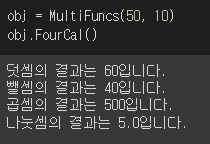

Student's solution

In [ ]:
class MultiFuncs:

  # Write further code







# Check if your code has no problem at all

obj = MultiFuncs(50, 10)
obj.FourCal()

#obj = MultiFuncs(20, 80)
#obj.FourCal()

Teacher's solution

In [3]:
class MultiFuncs:

  def __init__(self, alpha, beta):
    self.alpha = alpha
    self.beta = beta

  def FourCal(self):
    print(f"덧셈의 결과는 {self.alpha + self.beta}입니다.")
    print(f"뺄셈의 결과는 {self.alpha - self.beta}입니다.")
    print(f"곱셈의 결과는 {self.alpha * self.beta}입니다.")
    print(f"나눗셈의 결과는 {self.alpha / self.beta}입니다.")


#obj = MultiFuncs(50, 10)
#obj.FourCal()

### Problem 2.

위에서 정의된 MultiFuncs class를 보다보니, 주어진 숫자들의 최대값을 찾는 Maxima method와, 평균을 찾아주는 Mean method를 추가하고 싶어졌다.

위의 기능들이 추가된 새로운 class FultiFuncs2를 작성하시오.
<br><br>

- MultiFuncs의 method를 복사/붙여넣기할 수 없고, 상속해야 한다.

- 새롭게 추가된 두 methods는 결과를 print() 해주어야 한다.

- Fourcal method까지 합쳐서 총 세 개의 기능을 할 수 있어야 한다.

- You know, manual counting is always banned!

<br><br>
즉, 다음과 같이 작성했을 때 이러한 결과가 나와야 한다.

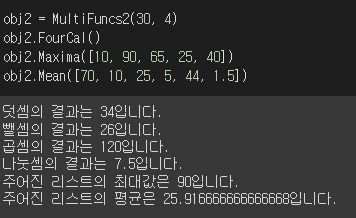

Student's solution

In [4]:
# Write your code

class MultiFuncs2(MultiFuncs):
  def Maxima(self, bob): # bob will be a list

    # do sth
    realMax = max(bob)

    print(f"주어진 리스트의 최대값은 {realMax}입니다.")
    


obj2 = MultiFuncs2(30, 4)
obj2.Maxima([10, 90, 65, 25, 40])















# Validate your class

# obj2 = MultiFuncs2(30, 4)
# obj2.FourCal()
# obj2.Maxima([10, 90, 65, 25, 40])
# obj2.Mean([70, 10, 25, 5, 44, 1.5])

주어진 리스트의 최대값은 90입니다.


Teacher's solution

In [ ]:
class MultiFuncs2(MultiFuncs):

  def Maxima(self, myList):

    print(f"주어진 리스트의 최대값은 {max(myList)}입니다.")

  def Mean(self, myList):
    print(f"주어진 리스트의 평균은 {sum(myList) / len(myList)}입니다.")


obj2 = MultiFuncs2(30, 4)
obj2.FourCal()
obj2.Maxima([10, 90, 65, 25, 40])
obj2.Mean([70, 10, 25, 5, 44, 1.5])

### Problem 3(Challenging Problem).

※ 이 문제는, 학생이 Problem 2까지 정답을 작성했다는 가정 하의 상황이다.

드디어, 바라던 MultiFuncs2 class를 완성하였다.

위에서 보았듯, 숫자들 혹은 숫자의 배열을 넣으면, 원하는 결과를 출력해주기 때문이다.




<br><br>
하나의 class에서 여러 개의 object를 만들 수 있기 때문에, ```[70, 10, 25, 5, 44, 1.5]```와 ```[10, 90, 65, 25, 40]```의 평균끼리 비교해보기 위하여 다음과 같은 코드를 작성했다.

In [ ]:
obj1 = MultiFuncs2(0, 0) # FourCal method를 사용하지 않기 때문에, 객체 변수의 값은 무엇이 되던 상관없다.
obj1.Maxima([70, 10, 25, 5, 44, 1.5])

obj2 = MultiFuncs2(0, 1) # FourCal method를 사용하지 않기 때문에, 객체 변수의 값은 무엇이 되던 상관없다.
obj2.Maxima([10, 90, 65, 25, 40])

결국 각 문장들은 Python string이기 때문에, Max1과 Max2 variable에 저장하여 이 둘을 비교해보려 했다. 그랬더니 다음과 같은 문제가 발생했다.

In [ ]:
obj1 = MultiFuncs2(0, 0) 
Max1 = obj1.Maxima([70, 10, 25, 5, 44, 1.5])

obj2 = MultiFuncs2(0, 1) 
Max2 = obj2.Maxima([10, 90, 65, 25, 40])

Max1 > Max2

1. '>'을 사용할 수 없다고 나와있다. 왜냐하면, 문장과 문장은 비교할 수 없기 때문이다. 우리가 Maxima method를 작성할 때, number 자료형이 아닌 string 자료형을 사용했기 때문이다.

2. 그런데 알고보니, 오류 메세지가 말하길 Max1과 Max2가 string도 아닌 NoneType이라고 한다.

즉, 단순히 method를 호출했을 때 print는 잘 되었으나, **변수에 저장하려고 했더니 무언가 잘못되어 None이라는 empty type이 들어갔다는 것이다.**



<br><br><br>
MultiFuncs2 class를 overriding을 통해서,

① string이 아닌 단순 숫자(값)만 ② 출력(print)가 아닌 반환(so that we can put the outputs of methods into variables)하도록 고쳐라.

-> 오버라이드된 **MultiFuncs3 class**를 만들어라.
<br><br>
**Hint** : 이 문제는 딱 한 줄의 코드만 필요하며, Week 4의 function 파트를 잘 복습해보면 엄청 쉬운 문제이다.


<br><br>
<예시 출력>

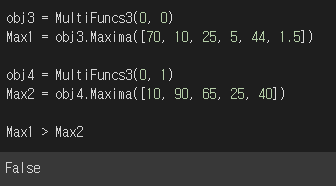

Student's solution

In [ ]:
class MultiFuncs3(MultiFuncs2):

  def Maxima(self, myList):

    # One-liner solution



# Validate yours

obj3 = MultiFuncs3(0, 0) 
Max1 = obj3.Maxima([70, 10, 25, 5, 44, 1.5])

obj4 = MultiFuncs3(0, 1) 
Max2 = obj4.Maxima([10, 90, 65, 25, 40])

Max1 > Max2

Teacher's solution

In [ ]:
class MultiFuncs3(MultiFuncs2):

  def Maxima(self, myList):

    return (max(myList))


obj3 = MultiFuncs3(0, 0) 
Max1 = obj3.Maxima([70, 10, 25, 5, 44, 1.5])

obj4 = MultiFuncs3(0, 1) 
Max2 = obj4.Maxima([10, 90, 65, 25, 40])

Max1 > Max2